In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "PingFang TC"]



In [38]:
# 加载并预处理MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据重塑为LSTM所需的三维格式 [样本数, 时间步, 特征数]
x_train = x_train.reshape(-1, 28, 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28).astype('float32') / 255.0

# # 标签独热编码
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)


In [39]:
# 构建LSTM模型
model = tf.keras.Sequential([
	# 输入层
	tf.keras.Input(shape=(28, 28)),
    # 第一层LSTM：128个神经元，返回序列用于多层堆叠
    tf.keras.layers.LSTM(units=128, return_sequences=True),
    # 第二层LSTM：64个神经元，仅返回最后一个时间步输出
    tf.keras.layers.LSTM(units=64),
    #  dropout层防止过拟合
    tf.keras.layers.Dropout(0.3),
    # 全连接输出层
    tf.keras.layers.Dense(10)
])

# 编译模型
model.compile(
    optimizer='adam',
    # loss='categorical_crossentropy',
	loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 打印模型结构
model.summary()

# 训练模型
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,442 (509.54 KB)

 Trainable params: 130,442 (509.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.6394 - loss: 1.0558 - val_accuracy: 0.9433 - val_loss: 0.1849
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9425 - loss: 0.1928 - val_accuracy: 0.9663 - val_loss: 0.1127
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9655 - loss: 0.1219 - val_accuracy: 0.9775 - val_loss: 0.0752
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9745 - loss: 0.0870 - val_accuracy: 0.9785 - val_loss: 0.0731
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9771 - loss: 0.0776 - val_accuracy: 0.9795 - val_loss: 0.0722


In [40]:
# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"测试集准确率: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9729 - loss: 0.0912
测试集准确率: 0.9786


findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not

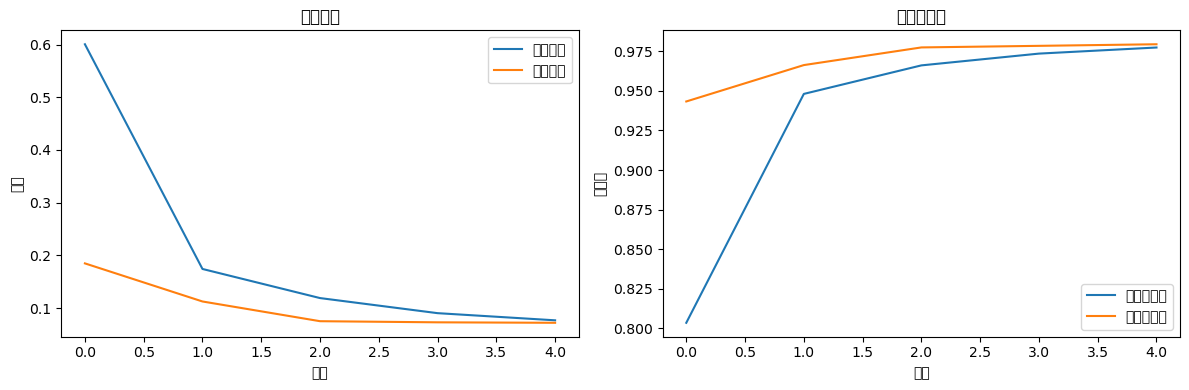

In [41]:
# 绘制训练过程
plt.figure(figsize=(12, 4))

# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('损失变化')
plt.xlabel('轮次')
plt.ylabel('损失')
plt.legend()

# 准确率曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('准确率变化')
plt.xlabel('轮次')
plt.ylabel('准确率')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'PingFang TC' not found.
/var/folders/h9/x7x6hfzs1vlf0drg7p35zmj00000gn/T/ipykernel_50604/2168805172.py:19: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-98

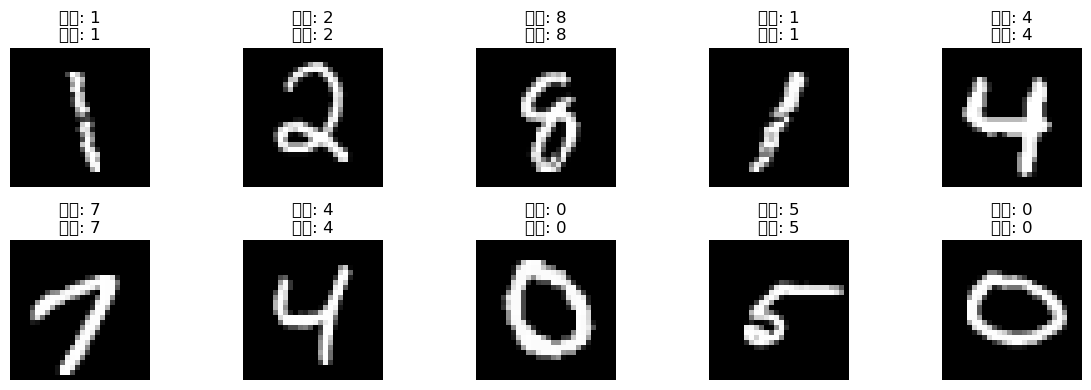

In [45]:
# 可视化预测结果
def plot_predictions(x_data, y_true, num_samples=10):
    indices = np.random.choice(len(x_data), num_samples)
    plt.figure(figsize=(12, 4))
    
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i+1)
        img = x_data[idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        
        pred = model.predict(x_data[idx].reshape(1, 28, 28))
        pred_class = np.argmax(pred)
        # true_class = np.argmax(y_true[idx])
        true_class = y_true[idx]
        
        plt.title(f"预测: {pred_class}\n真实: {true_class}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 执行预测可视化
plot_predictions(x_test, y_test)